In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

import seaborn as sns  #generating a graph in a sharp and crisp way.
%config InlineBackend.figure_format = 'svg'  #to include graphics in '.svg' format
#Disable Warnings
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = 8,5
plt.rcParams['image.cmap'] = 'viridis'


In [ ]:
df = pd.read_csv('C:\\Users\\KARTIK RAINA\\Downloads\\telecom_churn.csv')
df

In [ ]:
#Univariant Analysis
#histogram 
# .hist()
features = ['total day minutes' , 'total intl calls']
df[features].hist(figsize=(12,4));

In [ ]:
# Density Plot --> smooth transition of Histogram
df[features].plot(kind='density', subplots=True, layout=(1,2),figsize=(12,4));

In [ ]:
#seaborn --> distplot
sns.distplot(df['total day minutes']);

In [ ]:
# Box Plot 
# or Whisker plot
ax = sns.boxplot(x = df['total intl calls']);

In [ ]:
sns.violinplot(data = df['total day minutes']);

In [ ]:
# Categorical and Binary Features
df['churn'].value_counts()

In [ ]:
#countplot
sns.countplot(x = 'churn', data = df);

In [ ]:
#Multivariate visualisation
#1. Correlation Matrix Plot
#Drop Non-Numerical values
""" Formula for Correlation: Xnorm = (X - Xmin) / (Xmaxx - Xmin) """

numerical = list(set(df.columns) - set(['state'
                                        'international plan',
                                       'voice mail plan',
                                       'area code',
                                       'churn',
                                       'customer service calls']))   #set is used whenever we want unique values
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix);   #for correlation 

corr_matrix

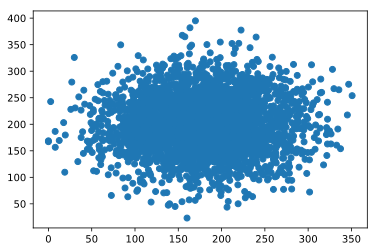

In [16]:
#2. Scatter Plot
plt.scatter(df['total day minutes'],df['total night minutes']);

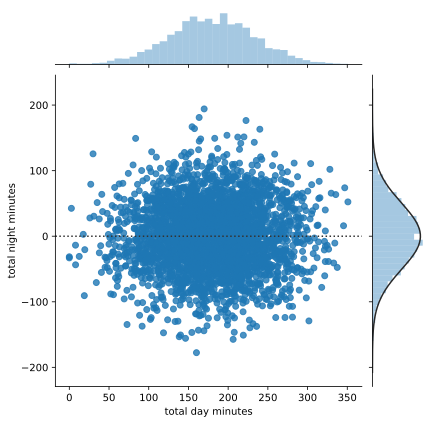

In [17]:
# Alternative of scatter plot with seaborn.
sns.jointplot(x = 'total day minutes', y = 'total night minutes', data = df, kind = 'resid');

In [18]:
#pearsonr --> pearson correlation Coefficient

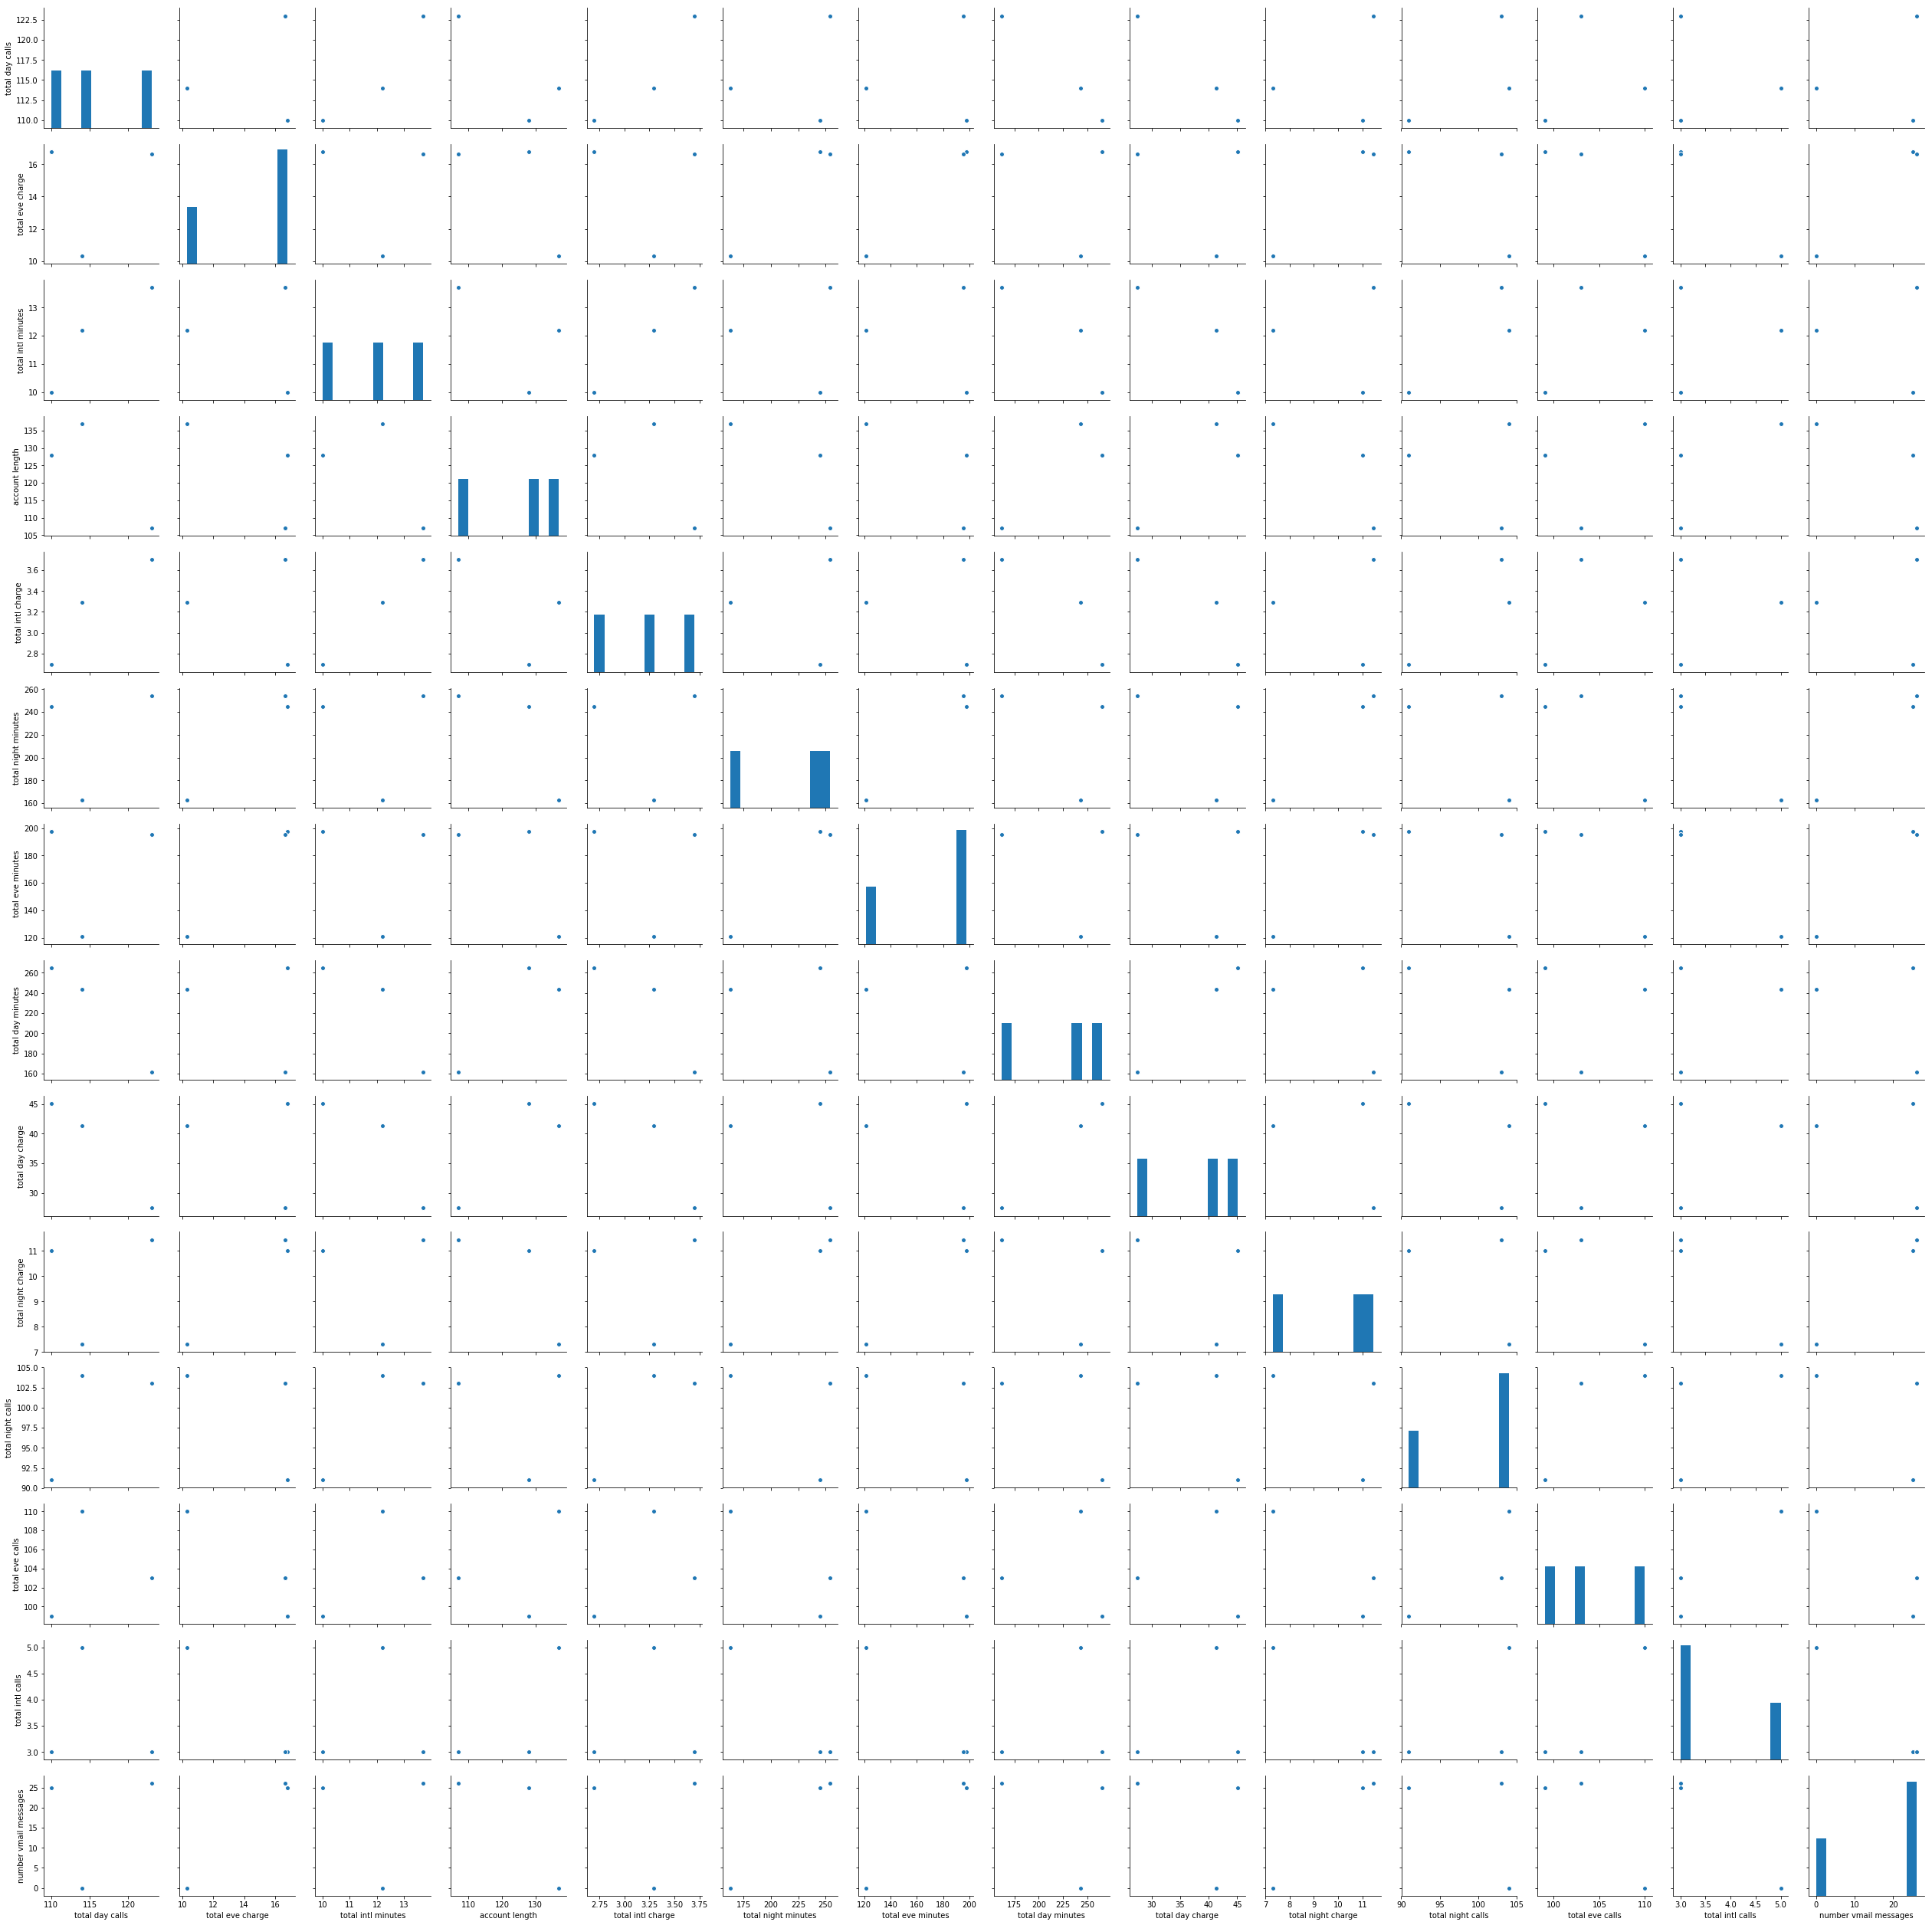

In [19]:
#SCatter matrix
%config InlineBackend.figure_format = 'png'
sns.pairplot((df[numerical]).head(3))

In [20]:
data = pd.read_csv('C:\\Users\\KARTIK RAINA\\Downloads\\video_games_sales.csv')

In [21]:
data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


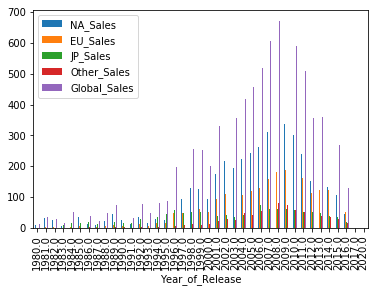

In [23]:
test = data[[x for x in data.columns if 'Sales' in x] + ['Year_of_Release']].groupby('Year_of_Release').sum().plot(kind='bar');

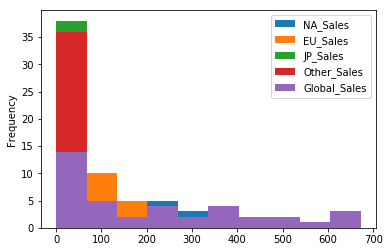

In [24]:
test = data[[x for x in data.columns if 'Sales' in x] + ['Year_of_Release']].groupby('Year_of_Release').sum().plot(kind='hist');

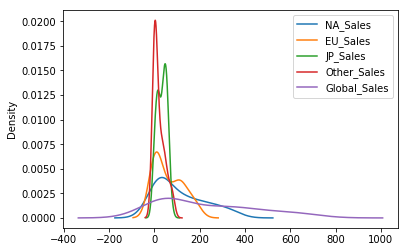

In [25]:
test = data[[x for x in data.columns if 'Sales' in x] + ['Year_of_Release']].groupby('Year_of_Release').sum().plot(kind='density');

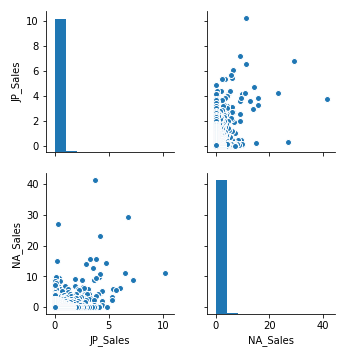

In [26]:
%config InlineBackend.figure_format='png'
sns.pairplot(data[['JP_Sales','NA_Sales']]);

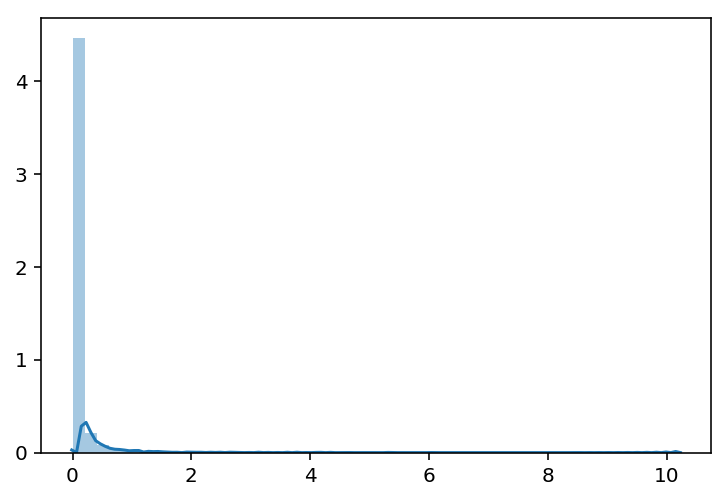

In [27]:
%config InlineBackend.figure_format='png2x'
sns.distplot(data[['JP_Sales']]);

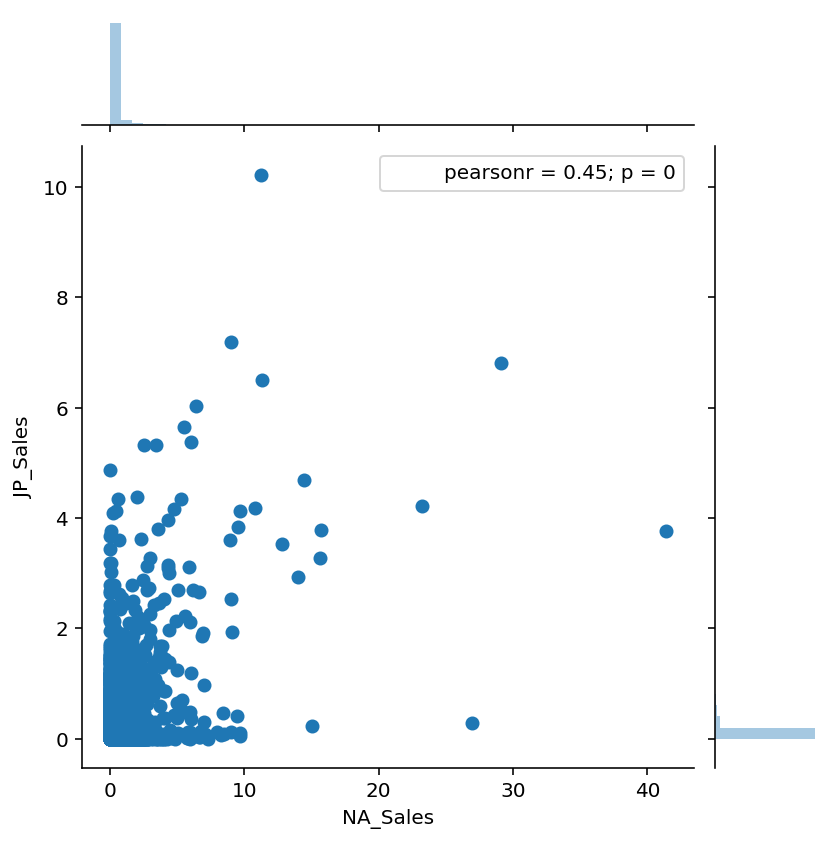

In [28]:
sns.jointplot(x = 'NA_Sales', y = 'JP_Sales' , data = data, kind = 'scatter');

In [29]:
import plotly
import plotly.graph_objs as go


In [30]:
years_df = data.groupby('Year_of_Release')[['Global_Sales']].sum().join(data.groupby('Year_of_Release')[['Name']].count())
years_df.columns = ['Global_Sales' , 'Number_Of_Games']
years_df

,Global_Sales,Number_Of_Games
Year_of_Release,,
1980.0,11.38,9
1981.0,35.77,46
1982.0,28.86,36
1983.0,16.79,17
1984.0,50.36,14
1985.0,53.94,14
1986.0,37.07,21
1987.0,21.74,16
1988.0,47.22,15


In [31]:
from plotly.offline import download_plotlyjs , init_notebook_mode,  plot, iplot    #init_notebook_mode --> checks the version of notebook

init_notebook_mode(connected = True)

trace0 = go.Scatter(
x = years_df.index,
y = years_df['Global_Sales'],
name = "Global Sales")

trace1 = go.Scatter(
x = years_df.index,
y = years_df['Number_Of_Games'],
name = "Number Of Games Released")

data1 = [trace0, trace1]

# Title for graph

layout = {'title':'Graph Using Plotly'}

fig = go.Figure(data = data1 , layout = layout)
iplot(fig , show_link = False)

In [32]:
plotly.offline.plot(fig , filename = 'sample1html' , show_link = False)

'file://C:\\Users\\KARTIK RAINA\\sample1html.html'